In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('dataset.csv')

plataformas_indesejadas = ["GC", "NES", "SNES", "PSP", "2600","PC", "GC", "WiiU","PCFX",'SCD','WS', 'NG' ,'TG16', '3DO', 'GG','GEN','DC' ,'PSV' ,'SAT','GC']

df = df[~df['Platform'].isin(plataformas_indesejadas) & (df['Year'] >= 2004)]

print(df['Year'].unique())

display(df)

[2006. 2008. 2009. 2005. 2007. 2010. 2013. 2004. 2011. 2015. 2012. 2014.
 2016. 2020. 2017.]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


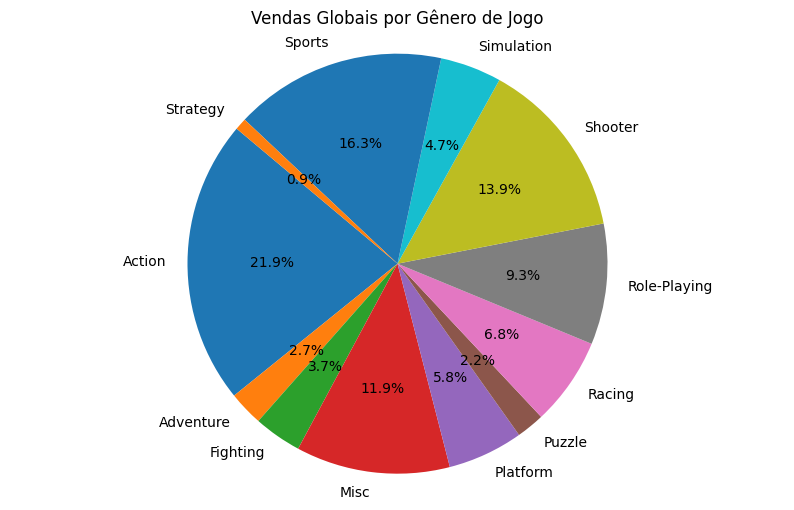

In [31]:
vendas_por_genero = df.groupby('Genre')['Global_Sales'].sum().reset_index()

generos = vendas_por_genero['Genre']
vendas_globais = vendas_por_genero['Global_Sales']

plt.figure(figsize=(10, 6))

plt.pie(vendas_globais, labels=generos, autopct='%1.1f%%', startangle=140)

plt.title('Vendas Globais por Gênero de Jogo')

plt.axis('equal')  
plt.show()

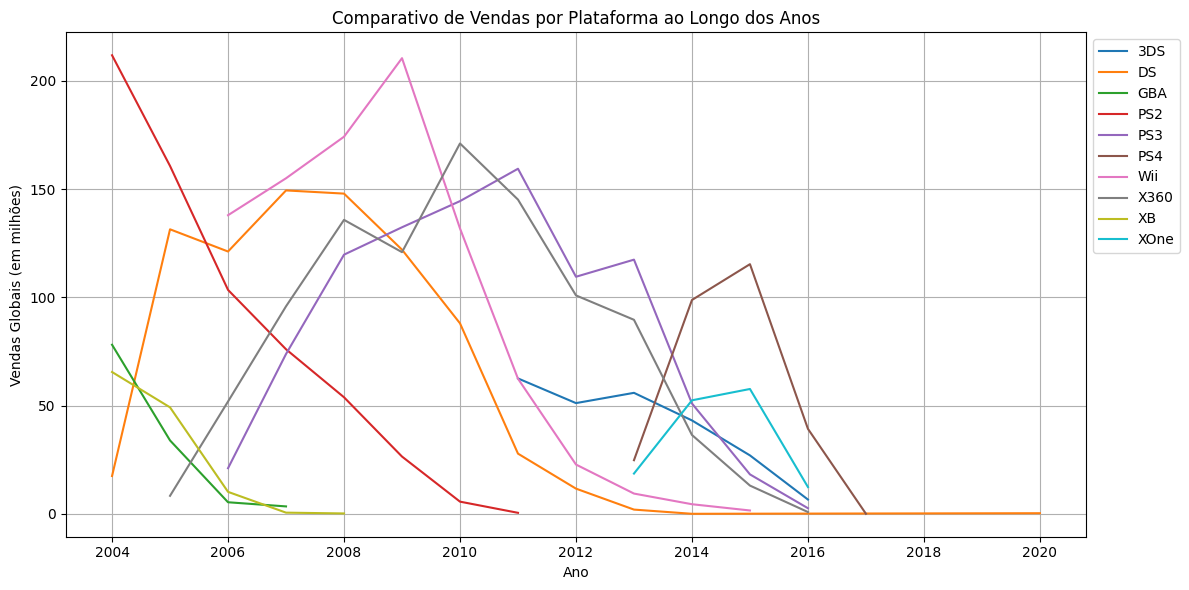

In [32]:
vendas_por_plataforma_ano = df.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))

for plataforma in vendas_por_plataforma_ano['Platform'].unique():
    vendas_plataforma = vendas_por_plataforma_ano[vendas_por_plataforma_ano['Platform'] == plataforma]
    plt.plot(vendas_plataforma['Year'], vendas_plataforma['Global_Sales'], label=plataforma)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Comparativo de Vendas por Plataforma ao Longo dos Anos')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()

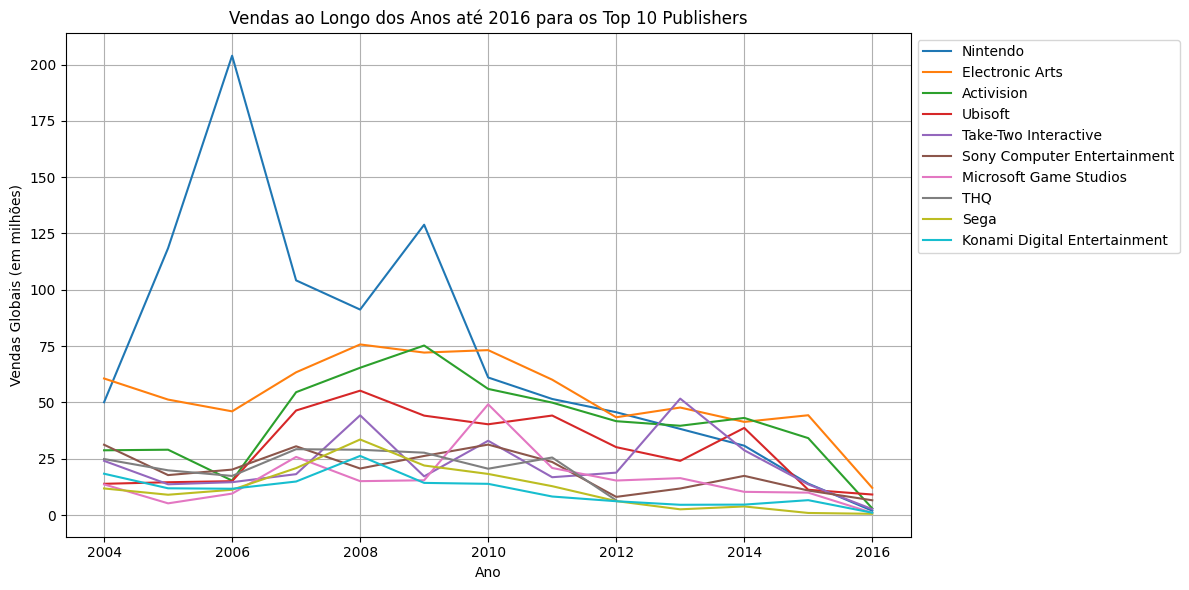

In [33]:
df_ate_2016 = df[df['Year'] <= 2016]

vendas_por_publisher_ano = df_ate_2016.groupby(['Publisher', 'Year'])['Global_Sales'].sum().reset_index()

top_10_publishers = vendas_por_publisher_ano.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index

vendas_top_10_publishers = vendas_por_publisher_ano[vendas_por_publisher_ano['Publisher'].isin(top_10_publishers)]

plt.figure(figsize=(12, 6))

for publisher in top_10_publishers:
    vendas_publisher = vendas_top_10_publishers[vendas_top_10_publishers['Publisher'] == publisher]
    plt.plot(vendas_publisher['Year'], vendas_publisher['Global_Sales'], label=publisher)

plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Vendas ao Longo dos Anos até 2016 para os Top 10 Publishers')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
top_5 = df.drop(['NA_Sales', 'EU_Sales', 'Other_Sales'], axis=1)
top_5 = top_5.nlargest(5, 'Global_Sales')
display(top_5)

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,2.93,29.02


In [39]:
top_20 = df.drop(['NA_Sales', 'EU_Sales', 'Other_Sales'], axis=1)
top_20 = top_20.nlargest(20, 'Global_Sales')
display(top_20)

,Rank,Name,Platform,Year,Genre,Publisher,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28,33.00
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,6.50,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,2.93,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,4.70,28.62
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,1.93,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,4.13,23.42
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,3.60,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,2.53,22.00


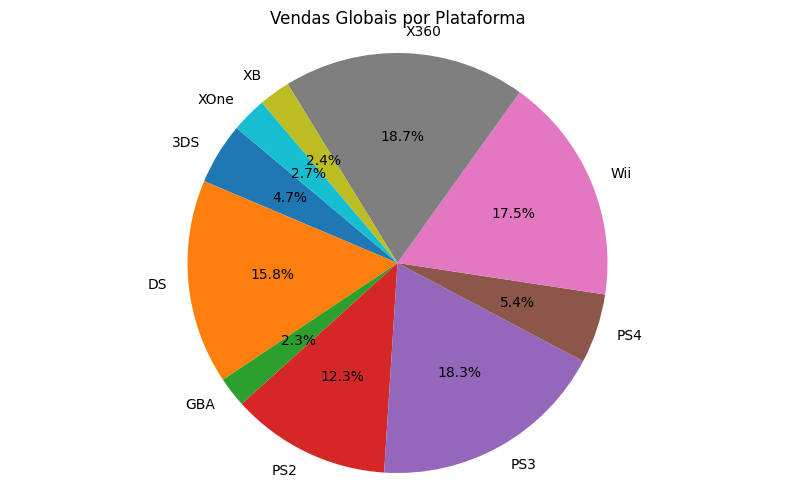

In [40]:
vendas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Preparar os dados para o gráfico de pizza
plataformas = vendas_por_plataforma['Platform']
vendas_globais = vendas_por_plataforma['Global_Sales']

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de pizza
plt.pie(vendas_globais, labels=plataformas, autopct='%1.1f%%', startangle=140)

# Adicionar um título
plt.title('Vendas Globais por Plataforma')

# Mostrar o gráfico
plt.axis('equal')  # Para garantir que o gráfico seja circular
plt.show()

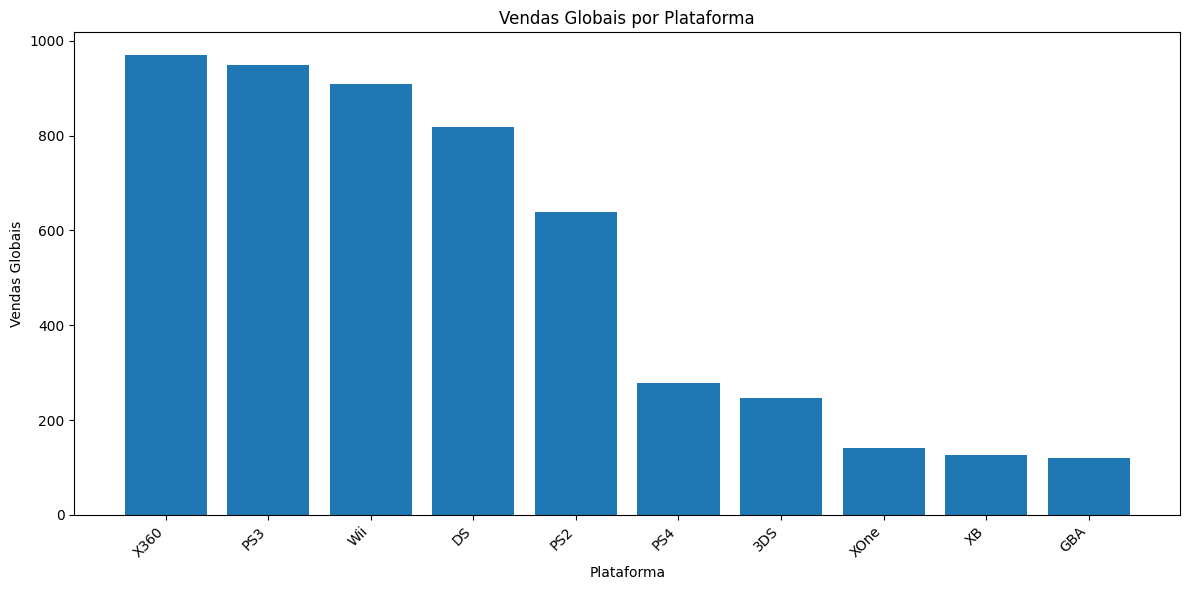

In [41]:
vendas_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Ordenar as vendas em ordem decrescente
vendas_por_plataforma = vendas_por_plataforma.sort_values(by='Global_Sales', ascending=False)

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
plt.bar(vendas_por_plataforma['Platform'], vendas_por_plataforma['Global_Sales'])

# Adicionar rótulos e título
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')
plt.title('Vendas Globais por Plataforma')

# Rotacionar os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()